# 1. Reading kmer presence/absence matrix which will be used as input to the model

In [1]:
import os
import pandas as pd

os.chdir('..')

# Reading the kmer presence/absence matrix into a dataframe to use as input to models
df = pd.read_csv('Data/Matrices/FullGeneKmerMatrix.csv', index_col=0)

# Checking that dataframe was read correctly
print(df.head())

        AAAACAACGCTAATCAAGCGAACAATCAAGC  AAACAACGCTAATCAAGCGAACAATCAAGCA  \
CA_001                              0.0                              0.0   
CA_002                              0.0                              0.0   
CA_003                              0.0                              0.0   
CA_005                              0.0                              0.0   
CA_007                              0.0                              0.0   

        AAATTATTAAAGTTTAAAGAATAACCACCAT  AAAGATTTTTGTAGTTCTTCATCTTGGTTAA  \
CA_001                              0.0                              0.0   
CA_002                              0.0                              0.0   
CA_003                              0.0                              0.0   
CA_005                              0.0                              0.0   
CA_007                              0.0                              0.0   

        AACAACGCTAATCAAGCGAACAATCAAGCAC  AACCAAGATGAAGAACTACAAAAATCTTTAG  \
CA_001    

# 2. Train/Test split with stratification

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

train_df, test_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0, stratify=df.loc[:,'Label'])
train_labels = train_df.loc[:,'Label']
test_labels = test_df.loc[:,'Label']

print('Number of samples within each class:\t\t\t\t\t ' , np.unique(df.loc[:,'Label'], return_counts=True))
print('Number of samples within each class in training dataframe (stratified):\t ' , np.unique(train_df.loc[:,'Label'], return_counts=True))
print('Number of samples within each class in testing dataframe (stratified):\t ', np.unique(test_df.loc[:,'Label'], return_counts=True))

# Dropping the labels of both the train and test dataframes after storing them in separate series above (train_labels, test_labels)
train_df = train_df.drop(labels='Label', axis=1)
test_df = test_df.drop(labels='Label', axis=1)

Number of samples within each class:					  (array([0, 1], dtype=int64), array([28, 92], dtype=int64))
Number of samples within each class in training dataframe (stratified):	  (array([0, 1], dtype=int64), array([22, 74], dtype=int64))
Number of samples within each class in testing dataframe (stratified):	  (array([0, 1], dtype=int64), array([ 6, 18], dtype=int64))


# Building Support Vector Machines classifier 
# using default parameters to determine baseline accuracy.
**Default parameters for Linear SVM (kernel='linear'):**
- C = 1
- tol = 0.001

**Default parameters for Polynomial SVM (kernel='poly'):**
- C = 1
- tol = 0.001
- degree = 3
- gamma = 'scale'
- coef0 = 0.0

**Default parameters for RBF SVM (kernel='rbf')**
- C = 1
- tol = 0.001
- gamma = 'scale'

**Default parameter for Sigmoid SVM (kernel='sigmoid')**
- C = 1
- tol = 0.001
- gamma = 'scale'
- coef0 = 0.0

In [8]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Initializing Linear SVM classifier using default parameters as baseline
svm_estimator_linear = svm.SVC(random_state=0,  kernel='linear')
baseline_accuracy_linear = cross_val_score(svm_estimator_linear, train_df, train_labels, cv=5, scoring='accuracy')
baseline_f1_linear = cross_val_score(svm_estimator_linear, train_df, train_labels, cv=5, scoring='f1_weighted')

print('Linear SVM:\n')
print('Baseline accuracy: ')
print(baseline_accuracy_linear)
print('Mean baseline accuracy:', baseline_accuracy_linear.mean())

print('\nBaseline F1 score: ')
print(baseline_f1_linear)
print('Mean baseline F1 score:', baseline_f1_linear.mean())
print('---------------------------------------------------------------\n\n')

# Initializing Polynomial (degree = 3) SVM classifier using default parameters as baseline
svm_estimator_poly = svm.SVC(random_state=0,  kernel='poly')
baseline_accuracy_poly = cross_val_score(svm_estimator_poly, train_df, train_labels, cv=5, scoring='accuracy')
baseline_f1_poly = cross_val_score(svm_estimator_poly, train_df, train_labels, cv=5, scoring='f1_weighted')

print('Polynomial (degree = 3) SVM:\n')
print('Baseline accuracy: ')
print(baseline_accuracy_poly)
print('Mean baseline accuracy:', baseline_accuracy_poly.mean())

print('\nBaseline F1 score: ')
print(baseline_f1_poly)
print('Mean baseline F1 score:', baseline_f1_poly.mean())
print('---------------------------------------------------------------\n\n')

# Initializing RBF SVM classifier using default parameters as baseline
svm_estimator_rbf = svm.SVC(random_state=0,  kernel='rbf')
baseline_accuracy_rbf = cross_val_score(svm_estimator_rbf, train_df, train_labels, cv=5, scoring='accuracy')
baseline_f1_rbf = cross_val_score(svm_estimator_rbf, train_df, train_labels, cv=5, scoring='f1_weighted')

print('Radial Basis Function (RBF) SVM:\n')
print('Baseline accuracy: ')
print(baseline_accuracy_rbf)
print('Mean baseline accuracy:', baseline_accuracy_rbf.mean())

print('\nBaseline F1 score: ')
print(baseline_f1_rbf)
print('Mean baseline F1 score:', baseline_f1_rbf.mean())
print('---------------------------------------------------------------\n\n')

# Initializing sigmoid SVM classifier using default parameters as baseline
svm_estimator_sigmoid = svm.SVC(random_state=0,  kernel='sigmoid')
baseline_accuracy_sigmoid = cross_val_score(svm_estimator_sigmoid, train_df, train_labels, cv=5, scoring='accuracy')
baseline_f1_sigmoid = cross_val_score(svm_estimator_sigmoid, train_df, train_labels, cv=5, scoring='f1_weighted')

print('Sigmoid SVM:\n')
print('Baseline accuracy: ')
print(baseline_accuracy_sigmoid)
print('Mean baseline accuracy:', baseline_accuracy_sigmoid.mean())

print('\nBaseline F1 score: ')
print(baseline_f1_sigmoid)
print('Mean baseline F1 score:', baseline_f1_sigmoid.mean())

Linear SVM:

Baseline accuracy: 
[0.6        0.68421053 0.52631579 0.84210526 0.63157895]
Mean baseline accuracy: 0.6568421052631578

Baseline F1 score: 
[0.5625     0.69838057 0.57004049 0.83337376 0.61120543]
Mean baseline F1 score: 0.6551000485083678
---------------------------------------------------------------


Polynomial (degree = 3) SVM:

Baseline accuracy: 
[0.75       0.73684211 0.78947368 0.78947368 0.78947368]
Mean baseline accuracy: 0.7710526315789474

Baseline F1 score: 
[0.64285714 0.62519936 0.69659443 0.69659443 0.69659443]
Mean baseline F1 score: 0.6715679573264712
---------------------------------------------------------------


Radial Basis Function (RBF) SVM:

Baseline accuracy: 
[0.75       0.73684211 0.78947368 0.84210526 0.78947368]
Mean baseline accuracy: 0.781578947368421

Baseline F1 score: 
[0.64285714 0.62519936 0.69659443 0.80191388 0.69659443]
Mean baseline F1 score: 0.6926318469971721
---------------------------------------------------------------


Sig

# 4. Hyperparameter tuning using GridSearchCV


### 4.1 Hyperparameter tuning of Linear SVM

In [53]:
# Setting grid search parameters for tuning
param_grid_linear = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'tol': [0.001,0.0001,0.00001],

}

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing grid search to tune hyperparameters specified in param_dict
grid_search_linear = GridSearchCV(svm_estimator_linear, param_grid_linear, cv=5, scoring='accuracy', n_jobs=36)
grid_search_linear.fit(train_df, train_labels)

# Determining the best parameters
grid_results_linear_df=pd.DataFrame(grid_search_linear.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
best_params_linear_grid = grid_search_linear.best_params_
best_model_linear_grid = grid_search_linear.best_estimator_

print("\nBest parameter combination using grid search:", best_params_linear_grid)
print("\nThis combination has accuracy:\n", grid_results_linear_df[grid_results_linear_df['params'] == best_params_linear_grid])

# Determining accuracy and F1 score of the model with the most tuned hyperparameters from grid search
cv_accuracy_tuned_linear_model_grid = cross_val_score(best_model_linear_grid, train_df, train_labels, cv=5, scoring='accuracy')
cv_f1_tuned_linear_model_grid = cross_val_score(best_model_linear_grid, train_df, train_labels, cv=5, scoring='f1_weighted')

print('\nTuned Linear SVM accuracy: ')
print(cv_accuracy_tuned_linear_model_grid)
print('Mean tuned RandomForest accuracy:', cv_accuracy_tuned_linear_model_grid.mean())

print('\nTuned Linear SVM F1 score: ')
print(cv_f1_tuned_linear_model_grid)
print('Mean tuned Linear SVM F1 score:', cv_f1_tuned_linear_model_grid.mean())


Best parameter combination using grid search: {'C': 0.01, 'tol': 0.001}

This combination has accuracy:
    mean_test_score  std_test_score                     params
3         0.781579        0.036842  {'C': 0.01, 'tol': 0.001}

Tuned Linear SVM accuracy: 
[0.75       0.78947368 0.78947368 0.84210526 0.73684211]
Mean tuned RandomForest accuracy: 0.781578947368421

Tuned Linear SVM F1 score: 
[0.64285714 0.77017544 0.69659443 0.80191388 0.66985646]
Mean tuned Linear SVM F1 score: 0.7162794687252891


### 4.2 Hyperparameter tuning of Non-Linear SVM (Polynomial, RBF, Sigmoid)

In [3]:
# Setting grid search parameters for tuning
param_grid_nonlinear1 = {
    'C': [0.0001,0.001,0.01,0.1,1,10,100,1000],
    'tol': [0.001,0.0001,0.00001],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'degree':range(3,7,1),
    'gamma': ['scale','auto'],
}

In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing grid search to tune hyperparameters specified in param_dict
grid_search_nonlinear1 = GridSearchCV(svm.SVC(random_state=0), param_grid_nonlinear1, cv=5, scoring='accuracy', n_jobs=36, verbose=3)
grid_search_nonlinear1.fit(train_df, train_labels)

# Determining the best parameters
grid_results_nonlinear1_df=pd.DataFrame(grid_search_nonlinear1.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
best_params_nonlinear1_grid = grid_search_nonlinear1.best_params_
best_model_nonlinear1_grid = grid_search_nonlinear1.best_estimator_

print("\nBest parameter combination using grid search:", best_params_nonlinear1_grid)
print("\nThis combination has accuracy:\n", grid_results_nonlinear1_df[grid_results_nonlinear1_df['params'] == best_params_nonlinear1_grid])

# Determining accuracy and F1 score of the model with the most tuned hyperparameters from grid search
cv_accuracy_tuned_nonlinear1_model_grid = cross_val_score(best_model_nonlinear1_grid, train_df, train_labels, cv=5, scoring='accuracy')
cv_f1_tuned_nonlinear1_model_grid = cross_val_score(best_model_nonlinear1_grid, train_df, train_labels, cv=5, scoring='f1_weighted')
cv_roc_auc_tuned_nonlinear1_model_grid = cross_val_score(best_model_nonlinear1_grid, train_df, train_labels, cv=5, scoring='roc_auc')

print('\nTuned Nonlinear SVM accuracy: ')
print(cv_accuracy_tuned_nonlinear1_model_grid)
print('Mean tuned Nonlinear SVM accuracy:', cv_accuracy_tuned_nonlinear1_model_grid.mean())

print('\nTuned Nonlinear SVM F1 score: ')
print(cv_f1_tuned_nonlinear1_model_grid)
print('Mean tuned Nonlinear SVM F1 score:', cv_f1_tuned_nonlinear1_model_grid.mean())

print('\nTuned RandomForest ROC AUC score: ')
print(cv_roc_auc_tuned_nonlinear1_model_grid)
print('Mean tuned RandomForest ROC AUC score:', cv_roc_auc_tuned_nonlinear1_model_grid.mean())

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Best parameter combination using grid search: {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}

This combination has accuracy:
      mean_test_score  std_test_score  \
444         0.792105        0.029304   

                                                params  
444  {'C': 100, 'degree': 3, 'gamma': 'auto', 'kern...  

Tuned Nonlinear SVM accuracy: 
[0.75       0.78947368 0.78947368 0.84210526 0.78947368]
Mean tuned Nonlinear SVM accuracy: 0.7921052631578946

Tuned Nonlinear SVM F1 score: 
[0.64285714 0.77017544 0.69659443 0.80191388 0.69659443]
Mean tuned Nonlinear SVM F1 score: 0.7216270623081769

Tuned RandomForest ROC AUC score: 
[0.38666667 0.71428571 0.56666667 0.6        0.11666667]
Mean tuned RandomForest ROC AUC score: 0.47685714285714287


In [10]:
# Setting grid search parameters for tuning
param_grid_balanced = {
    'C': [0.0001,0.001,0.01,0.1,1,10,100,1000],
    'tol': [0.001,0.0001,0.00001],
    'kernel':['poly', 'rbf', 'sigmoid'],
    'degree':range(3,7,1),
    'gamma': ['scale','auto'],
    'class_weight': ['balanced']
}

In [11]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing grid search to tune hyperparameters specified in param_dict
grid_search_balanced = GridSearchCV(svm.SVC(random_state=0), param_grid_balanced, cv=5, scoring='accuracy', n_jobs=36, verbose=3)
grid_search_balanced.fit(train_df, train_labels)

# Determining the best parameters
grid_results_balanced_df=pd.DataFrame(grid_search_balanced.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
best_params_balanced_grid = grid_search_balanced.best_params_
best_model_balanced_grid = grid_search_balanced.best_estimator_

print("\nBest parameter combination using grid search:", best_params_balanced_grid)
print("\nThis combination has accuracy:\n", grid_results_balanced_df[grid_results_balanced_df['params'] == best_params_balanced_grid])

# Determining accuracy and F1 score of the model with the most tuned hyperparameters from grid search
cv_accuracy_tuned_balanced_model_grid = cross_val_score(best_model_balanced_grid, train_df, train_labels, cv=5, scoring='accuracy')
cv_f1_tuned_balanced_model_grid = cross_val_score(best_model_balanced_grid, train_df, train_labels, cv=5, scoring='f1_weighted')
cv_roc_auc_tuned_balanced_model_grid = cross_val_score(best_model_balanced_grid, train_df, train_labels, cv=5, scoring='roc_auc')

print('\nTuned balanced Nonlinear SVM accuracy: ')
print(cv_accuracy_tuned_balanced_model_grid)
print('Mean tuned balanced Nonlinear SVM accuracy:', cv_accuracy_tuned_balanced_model_grid.mean())

print('\nTuned balanced Nonlinear SVM F1 score: ')
print(cv_f1_tuned_balanced_model_grid)
print('Mean tuned balanced Nonlinear SVM F1 score:', cv_f1_tuned_balanced_model_grid.mean())

print('\nTuned balanced Nonlinear SVM ROC-AUC score: ')
print(cv_roc_auc_tuned_balanced_model_grid)
print('Mean tuned balanced Nonlinear SVM ROC-AUC score:', cv_roc_auc_tuned_balanced_model_grid.mean())


Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Best parameter combination using grid search: {'C': 0.0001, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001}

This combination has accuracy:
     mean_test_score  std_test_score  \
36         0.771053        0.022942   

                                               params  
36  {'C': 0.0001, 'class_weight': 'balanced', 'deg...  

Tuned balanced Nonlinear SVM accuracy: 
[0.75       0.73684211 0.78947368 0.78947368 0.78947368]
Mean tuned balanced Nonlinear SVM accuracy: 0.7710526315789474

Tuned balanced Nonlinear SVM F1 score: 
[0.64285714 0.62519936 0.69659443 0.69659443 0.69659443]
Mean tuned balanced Nonlinear SVM F1 score: 0.6715679573264712

Tuned balanced Nonlinear SVM ROC-AUC score: 
[0.32       0.3        0.36666667 0.58333333 0.51666667]
Mean tuned balanced Nonlinear SVM ROC-AUC score: 0.4173333333333333


# 5. Determining the model support vectors


In [7]:
# For nonlinear SVM without class balancing

# get indices of support vectors
print(best_model_nonlinear1_grid.support_)

# get number of support vectors for each class
print(best_model_nonlinear1_grid.n_support_)

[ 0  6  7  8  9 12 15 17 21 29 32 38 47 54 58 65 72 79 83 89 94 95  1  3
  4  5 11 13 14 18 20 25 26 28 30 33 37 42 43 44 45 46 50 51 52 53 55 56
 57 60 61 66 67 68 69 71 73 76 77 78 84 86 87 91 93]
[22 43]


In [98]:
# For nonlinear SVM with class balancing

# get indices of support vectors
print(best_model_balanced_grid.support_)

# get number of support vectors for each class
print(best_model_balanced_grid.n_support_)


[ 0  6  7  8  9 12 15 17 21 29 32 38 47 54 58 65 72 79 83 89 94 95  1  2
  3  4  5 10 11 13 14 16 18 19 20 22 23 24 25 26 27 28 30 31 33 34 35 36
 37 39 40 41 42 43 44 45 46 48 49 50 51 52 53 55 56 57 59 60 61 62 63 64
 66 67 68 69 70 71 73 74 75 76 77 78 80 81 82 84 85 86 87 88 90 91 92 93]
[22 74]


# 6. Using the Optimized SVM model on testing data to determine accuracy. This process is done once for nonlinear SVM model without class balancing and again for nonlinear SVM with class balancing.
- Classification report
- Confusion matrix


In [13]:
# For nonlinear SVM without class balancing

from sklearn.metrics import classification_report

SVM_nonlinear_model_predictions = best_model_nonlinear1_grid.predict(test_df) 
  
print(classification_report(test_labels, SVM_nonlinear_model_predictions))


              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.78      1.00      0.88        18

    accuracy                           0.79        24
   macro avg       0.89      0.58      0.58        24
weighted avg       0.84      0.79      0.73        24



In [109]:
# For nonlinear SVM with class balancing

from sklearn.metrics import classification_report

SVM_nonlinear_model_predictions = best_model_balanced_grid.predict(test_df) 
  
print(classification_report(test_labels, SVM_nonlinear_model_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.75      1.00      0.86        18

    accuracy                           0.75        24
   macro avg       0.38      0.50      0.43        24
weighted avg       0.56      0.75      0.64        24



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

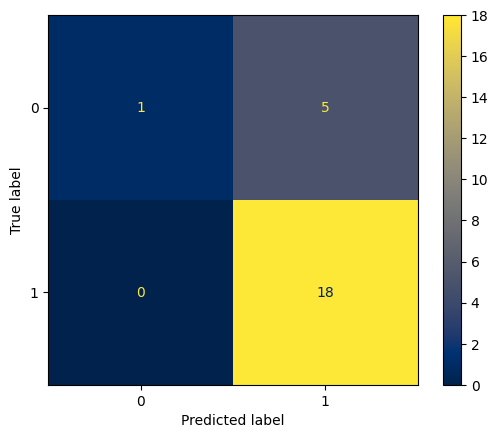

In [14]:
# For nonlinear SVM without class balancing

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

SVM_nonlinear_model_predictions = best_model_nonlinear1_grid.predict(test_df) 

disp = ConfusionMatrixDisplay.from_predictions(test_labels, SVM_nonlinear_model_predictions, labels=best_model_nonlinear1_grid.classes_, cmap='cividis')


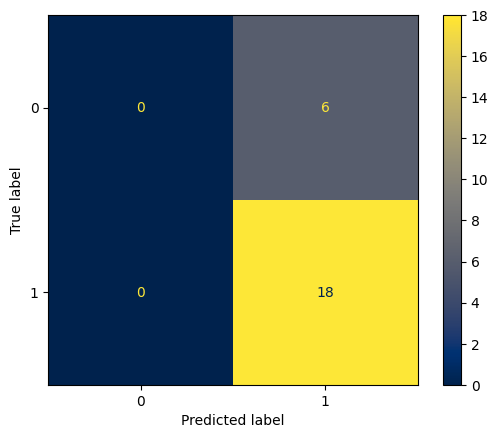

In [106]:
# For nonlinear SVM with class balancing

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

SVM_nonlinear_model_predictions = best_model_balanced_grid.predict(test_df) 

disp = ConfusionMatrixDisplay.from_predictions(test_labels, SVM_nonlinear_model_predictions, labels=best_model_balanced_grid.classes_, cmap='cividis')
